In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\hp\Documents\Datasets\Mall_Customers.csv')

# Exploratory Data Analysis

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data = data.drop('CustomerID', axis = 1)

In [9]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
data.shape

(200, 4)

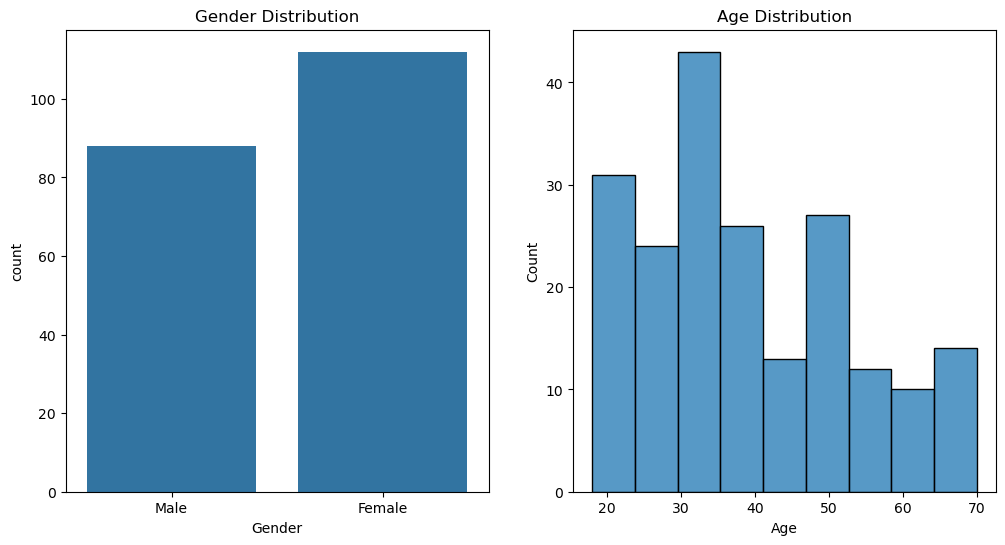

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.subplot(1,2,2)
sns.histplot(data['Age'] )
plt.title('Age Distribution')
plt.show()

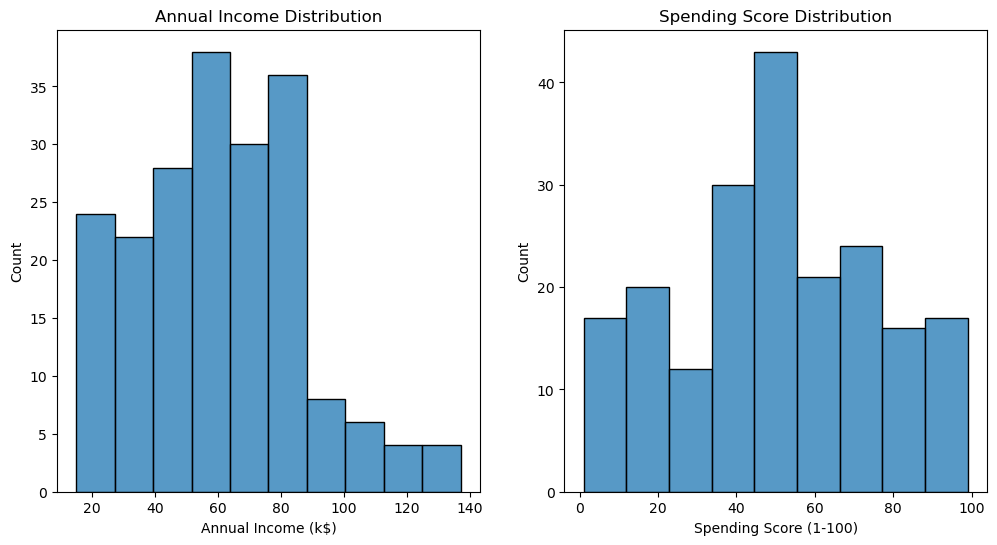

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.subplot(1,2,2)
sns.histplot(data['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.show()

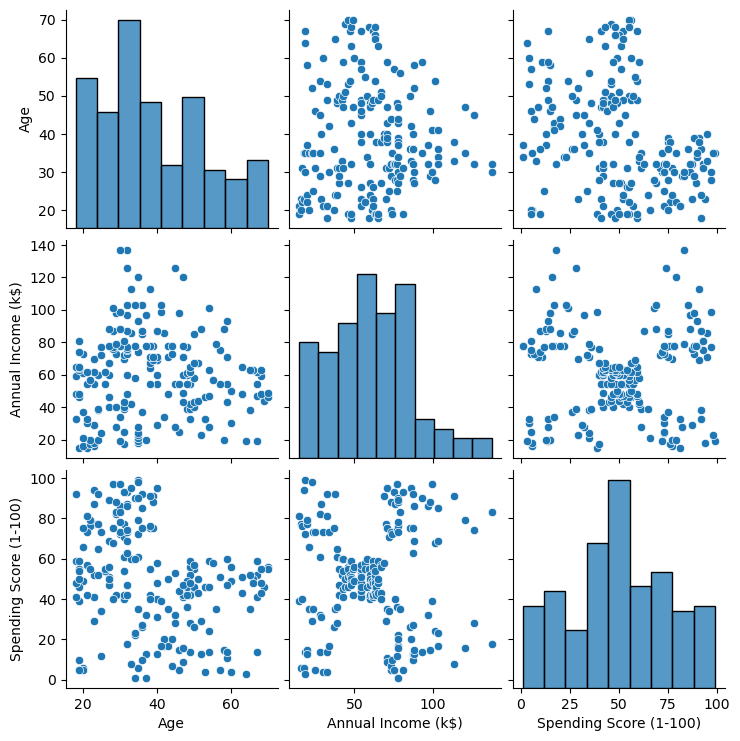

In [13]:
sns.pairplot(data)

<Axes: >

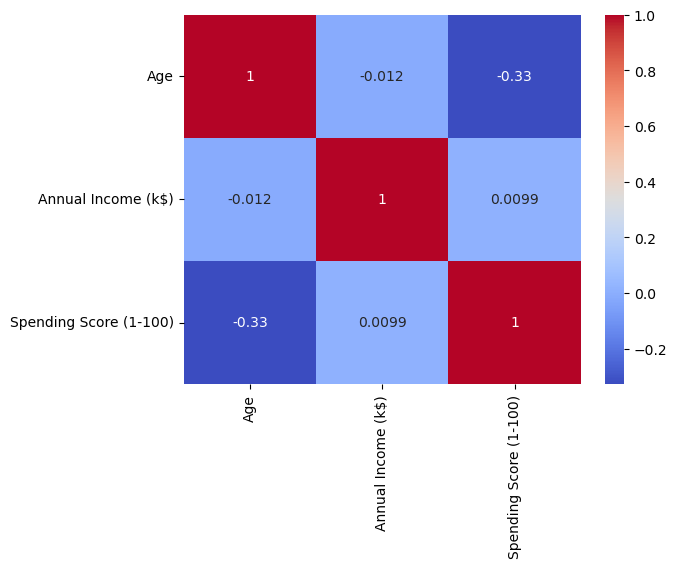

In [14]:
num = data.select_dtypes('number')
corr = num.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

A view of the plot prior to clusterin;

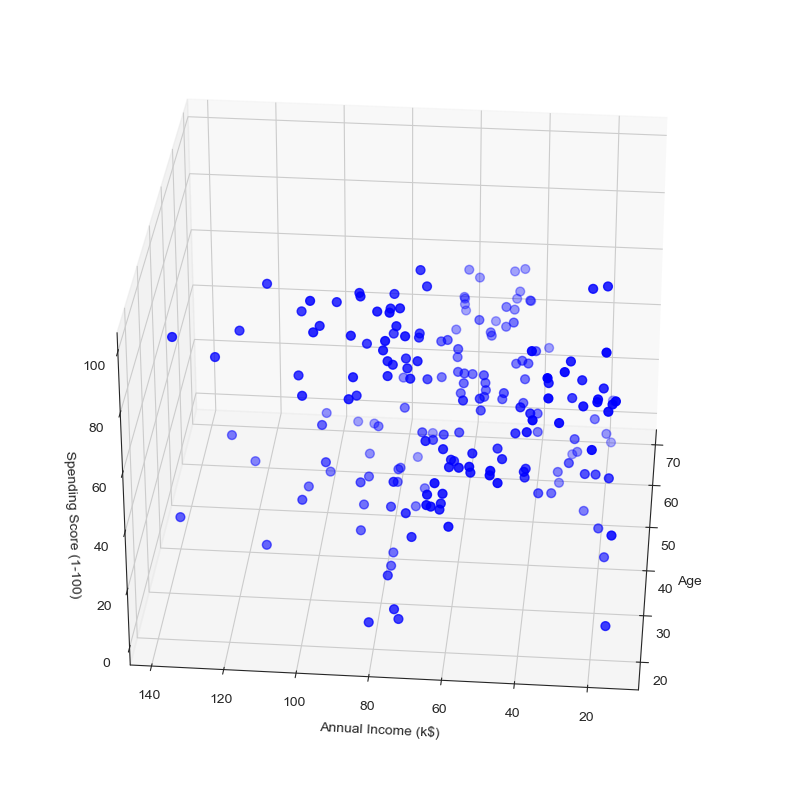

In [16]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('white')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'],data['Spending Score (1-100)'], c='blue', s=40)
ax.view_init(30, 185)
ax.set(xlabel='Age', ylabel='Annual Income (k$)', zlabel='Spending Score (1-100)')
plt.show()

# Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
X = data.drop('Gender', axis = 1)
ss = StandardScaler()
X_scaled = ss.fit_transform(X) 

# Model Building

In [20]:
from sklearn.cluster import KMeans

num_clusters = [i for i in range(2, 11)]
def kmeans_inertia(num_clusters, X):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=5826)
        kms.fit(X)
        inertia.append(kms.inertia_)
    return inertia

inertia = kmeans_inertia(num_clusters, X)
inertia

  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[225180.82535920606,
 169041.953125,
 109997.08872264271,
 75363.74835182933,
 58302.40630860368,
 51527.73675738675,
 48177.06252741596,
 40959.16217374664,
 37656.40455453795]

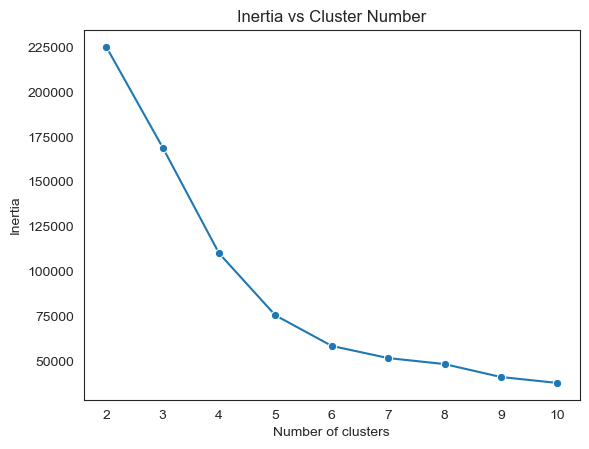

In [21]:
# Line plot to show relationship between cluster number and inertia
sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plt.xlabel('Number of clusters');
plt.ylabel('Inertia');
plt.title('Inertia vs Cluster Number');

In [22]:
from sklearn.metrics import silhouette_score
# Writing a function taht returns a list of each k-value's score.
def kmeans_sil(num_clusters, X):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=5826)
        kms.fit(X)
        sil_score.append(silhouette_score(X, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.33547192894004574,
 0.3503301017619873,
 0.4039582785148566,
 0.41664341513732767,
 0.4268547747113388,
 0.41604569074278636,
 0.37924437477750245,
 0.37059207380624654,
 0.3870014600633317]

Text(0.5, 1.0, 'Silhouette Score vs Number of CLusters')

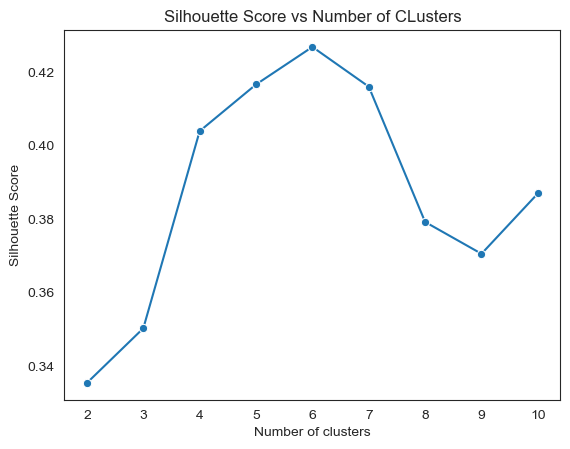

In [23]:
# Line plot to show relationship between cluster number and silhouette score
sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs Number of CLusters')

In [24]:
# fit a three-cluster model to the dataset

kmeans6 = KMeans(n_clusters=6,random_state=5826)
kmeans6.fit(X_scaled)
# unique labels of the model
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [25]:
data['cluster'] = kmeans6.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,2
3,Female,23,16,77,5
4,Female,31,17,40,2


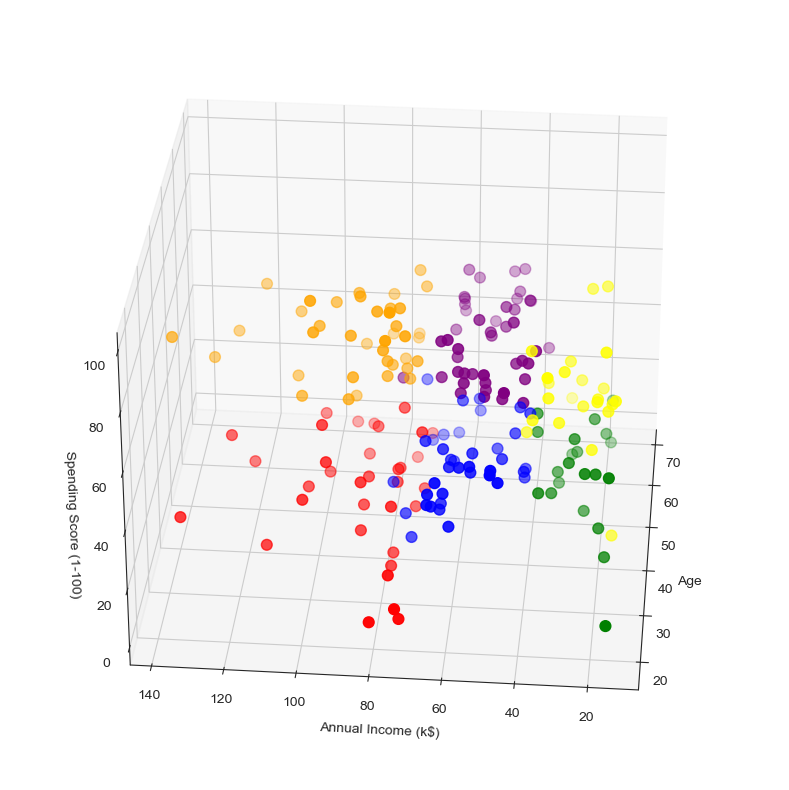

In [26]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(data.iloc[:, 1:])

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.Age[data.cluster == 0], data["Annual Income (k$)"][data.cluster == 0], 
           data["Spending Score (1-100)"][data.cluster == 0], c='blue', s=60)
ax.scatter(data.Age[data.cluster == 1], data["Annual Income (k$)"][data.cluster == 1], 
           data["Spending Score (1-100)"][data.cluster == 1], c='red', s=60)
ax.scatter(data.Age[data.cluster == 2], data["Annual Income (k$)"][data.cluster == 2], 
           data["Spending Score (1-100)"][data.cluster == 2], c='green', s=60)
ax.scatter(data.Age[data.cluster == 3], data["Annual Income (k$)"][data.cluster == 3], 
           data["Spending Score (1-100)"][data.cluster == 3], c='orange', s=60)
ax.scatter(data.Age[data.cluster == 4], data["Annual Income (k$)"][data.cluster == 4], 
           data["Spending Score (1-100)"][data.cluster == 4], c='purple', s=60)
ax.scatter(data.Age[data.cluster == 5], data["Annual Income (k$)"][data.cluster == 5], 
           data["Spending Score (1-100)"][data.cluster == 5], c='yellow', s=60)

ax.view_init(30, 185)
ax.set(xlabel='Age', ylabel='Annual Income (k$)', zlabel='Spending Score (1-100)')

plt.show()

The clusters highlight different spending behaviours. Blue (top-left) represents young, low-income big spenders, while green (top-centre) includes wealthy, high-spending individuals. Red (bottom-centre) consists of high earners who spend cautiously, likely older or conservative customers.  

Orange (bottom-left) represents budget-conscious individuals with both low income and low spending. Purple & yellow (right side) show older customers, indicating that age impacts spending habits—some spend selectively, others save more.  

For businesses, income doesn’t always equal spending. Younger people tend to spend more, while some high earners stay frugal. Understanding these patterns helps in crafting better marketing and pricing strategies.

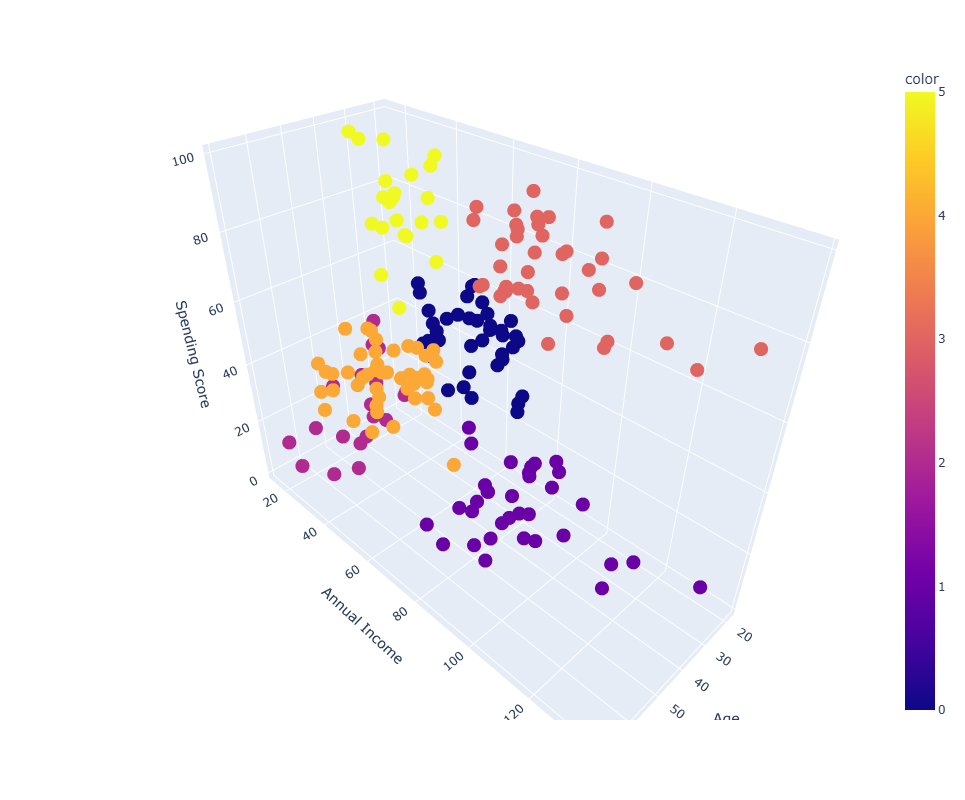

In [60]:
import plotly.express as px
labels={
        'x': 'Age',
        'y': 'Annual Income',
        'z': 'Spending Score'
    }
plot = px.scatter_3d(x=data['Age'], y=data['Annual Income (k$)'], z=data['Spending Score (1-100)'],color=data['cluster'],labels=labels,width=1000,   # increase width
    height=800)
plot.show()